In [1]:
import numpy as np
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

In [2]:
train.head() # 훈련 데이터 확인용

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test.head() # 테스트 데이터 확인용

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
submission.head() # 제출 형식 확인용

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [5]:
print("=====변환전=====")
train.info()
train['datetime'] = pd.to_datetime(train['datetime'])
print("=====변환후=====")
train.info()

=====변환전=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
=====변환후=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10

In [6]:
from datetime import datetime as dt

# 날짜, 연도, 월, 일, 시, 분, 초 파생피처 생성

train['date'] = train['datetime'].dt.date
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday


In [7]:
train.head() # 파생피처 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,4,0,0,5


In [8]:
train['season'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' }) # 계절 데이터 직관적으로 보려고 변환
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'}) # 날씨 데이터 직관적으로 보려고 변환
train['weekday'] = train['weekday'].map({0: 'Monday',
                                         1: 'Tuesday',
                                         2: 'Wednesday',
                                         3: 'Thursday',
                                         4: 'Friday',
                                         5: 'Saturday',
                                         6: 'Sunday',
                                        }) # 휴일 데이터 직관적으로 보려고 변환

In [9]:
# 변환됬는지 확인
print(train.head())
print('\n------tail------\n')
print(train.tail())
print('\n------info------\n')
train.info()

             datetime  season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0   Clear  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0   Clear  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0   Clear  9.02  13.635   
3 2011-01-01 03:00:00  Spring        0           0   Clear  9.84  14.395   
4 2011-01-01 04:00:00  Spring        0           0   Clear  9.84  14.395   

   humidity  windspeed  casual  registered  count        date  year  month  \
0        81        0.0       3          13     16  2011-01-01  2011      1   
1        80        0.0       8          32     40  2011-01-01  2011      1   
2        80        0.0       5          27     32  2011-01-01  2011      1   
3        75        0.0       3          10     13  2011-01-01  2011      1   
4        75        0.0       0           1      1  2011-01-01  2011      1   

   day  hour  minute  second   weekday  
0    1     0       0       0  Sat

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 분포도 그래프

수치형 데이터의 집계값(총 개수, 비율 등)을 나타내는 그래프

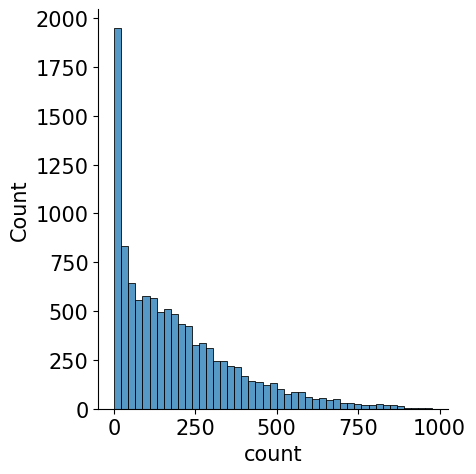

In [11]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    mpl.rc('font', size=15)
    sns.displot(train['count']) # 분포도 출력

위 그래프의 내용
- x축은 count의 실제값
- y축은 밀도수

# 선형회귀 모델이란?

## 정의

선형 회귀 모델은 종속 변수와 하나 이상의 독립 변수(또는 설명 변수) 간의 관계를 모델링하는 통계적 기법이다. 이 모델은 주어진 독립 변수들의 선형 조합을 사용하여 종속 변수의 값을 예측하는 방법을 기반으로 한다.

## 기본형태

Y = $\beta_0$ + $\beta_1\chi_1$ + $\beta_2\chi_2$ + $\dots$ + $\beta_p\chi_p\chi_p$ + ε

- Y는 종속 변수
    - 종속변수란 분석의 대상이 되는 변수 (여기서는 개수를 구해야 하므로 count가 종속 변수)
- $\chi_1\chi_2\chi_3$...$\chi_p$ 는 독립 변수
    - 독립변수란 종속 변수에 영향을 미치는 변수 (여기서는 날씨, 계절, 온도 등)
- $\beta_0\beta_1\beta_2$...$\beta_p$는 모델의 파라미터 또는 회귀 계수 $\beta_0$는 절편이며 $\beta_1\beta_2$,...,$\beta_p$는 독립 변수의 가중치
    - 절편은 독립변수 $\chi$가 0일때의 기본적인 값
- ε는 모델의 오차 항, 종속 변수 Y를 설명하지 못하는 다른 요소를 포함하는 것

## 정규분포를 따라야 성능이 좋아지는 이유

그래프를 봤을때 예측하고자 하는 count의 분포는 0 (왼쪽)으로 몰려있는데 회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따랐을때 성능이 좋다고한다. 이유는

- 가정의 충족: 선형 회귀 모델은 종속 변수와 독립 변수 사이에 선형 관계를 가정하며 잔차(residuals)가 정규분포를 따른다고 가정합니다. 따라서 종속 변수와 독립 변수 사이의 관계가 비선형이거나, 잔차가 비정규분포를 따를 경우 모델의 성능이 떨어질 수 있습니다.
    - 잔차란 실제 관측값과 모델에 의한 예측값 사이의 차이 잔차는 모델이 예측하지 못한 부분 또는 오차를 말한다.
- 통계적 검정: 회귀 분석에서는 계수의 통계적 유의성을 평가하는데, 정규분포에서 파생된 통계적 검정 방법들이 많이 사용된다. 따라서 데이터가 정규분포를 따를 때, 통계적 검정 결과가 더 신뢰할 수 있다.
- 예측 성능 향상: 몇몇 회귀 모델은 정규분포 가정을 기반으로 하여 최적의 성능을 발휘할 수 있습니다. 특히, 일부 선형 회귀 모델(클래식 선형 회귀, 일반화 선형 모델, 일반화 선형 혼합 모델, 가우시안 프로세스 회기 모델 등)은 잔차가 정규분포를 따를 때 더 정확한 예측을 제공할 수 있다.

따라서 로그변환을 통해 왼쪽으로 몰려있는 count의 값을 로그화(어떤 특정한 값을 어떤 특정한 값으로 올라갔을 때 얼마나 많이 올라갔는지를 나타내는 지수) 해야한다.

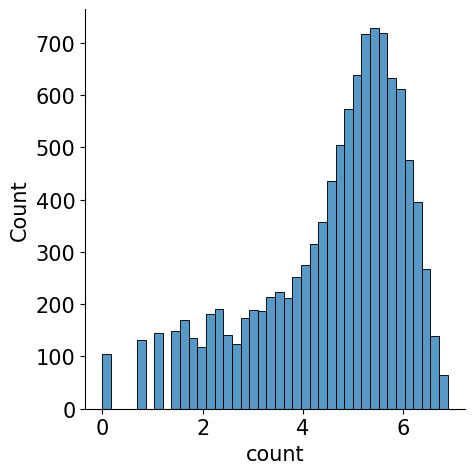

In [12]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.displot(np.log(train['count']))

# 막대 그래프

범주형 데이터 인 날짜를 좀더 세분화하여 쪼갰던 파생피처 (연,월,일 등)에 따라 대여 수량이 어떻게 다른지 확인

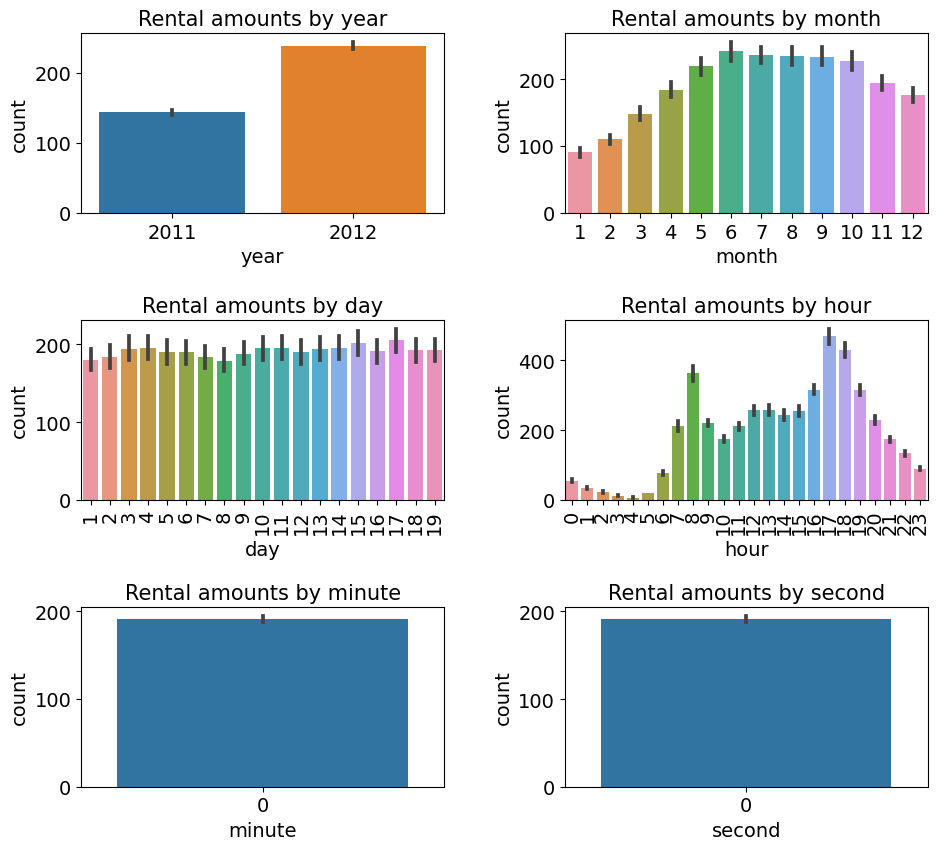

In [13]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

위 그래프들 정리

1. Rental amounts by year
이 자전거 대여 서비스가 처음나온 2011년보다는 좀 홍보가된 2012년에 수요가 더많다는걸 볼수있긴한데 주어진 데이터가 2011년 2012년 2년치 뿐이라 의미가 없는거같다
2. Rental amounts by month
1~2월은 추워서 대여수량이 확실히 적어지고 따듯해지는 3월부터 점점 늘다가 다시 추워지는 11월 부터는 점점 감소함
3. Rental amounts by day
일별로 집계한건 큰 의미가 없는거같다
4. Rental amounts by hour
보통 출 퇴근시간인 7,8시와 17,18시쯤 대여량이 많다
5. Rental amounts by minute
제공된 miniute 데이터가 다 0이라 의미가 없다
5. Rental amounts by second
제공된 second 데이터가 다 0이라 의미가 없다

# 박스 플롯 그래프
범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프 계절, 날씨, 공휴일, 근무일 데이터를 이 그래프로 그리면 각 데이터들에 따라 대여 수량이 어떻게 변하는지 볼 수 있다

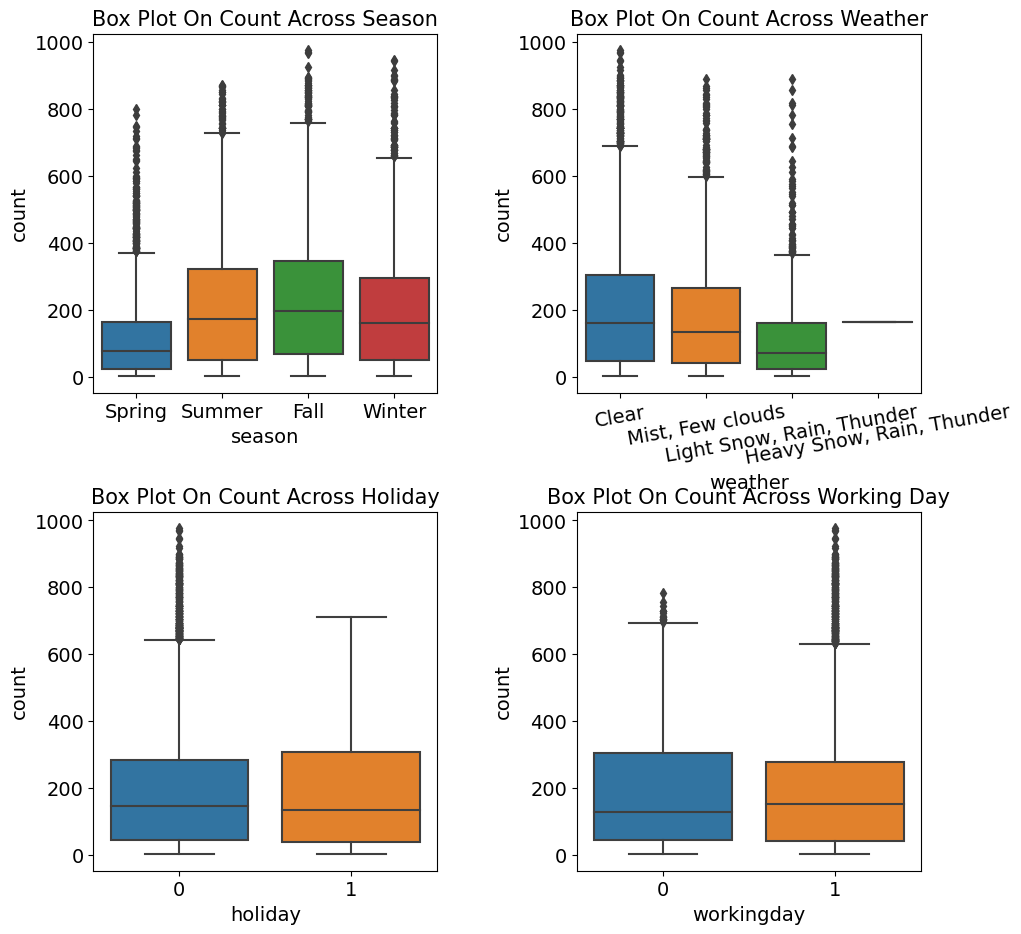

In [14]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

# 포인트 플롯 그래프

한 화면에 여러 값들을 그려 비교할 수 있는 그래프

<Axes: xlabel='hour', ylabel='count'>

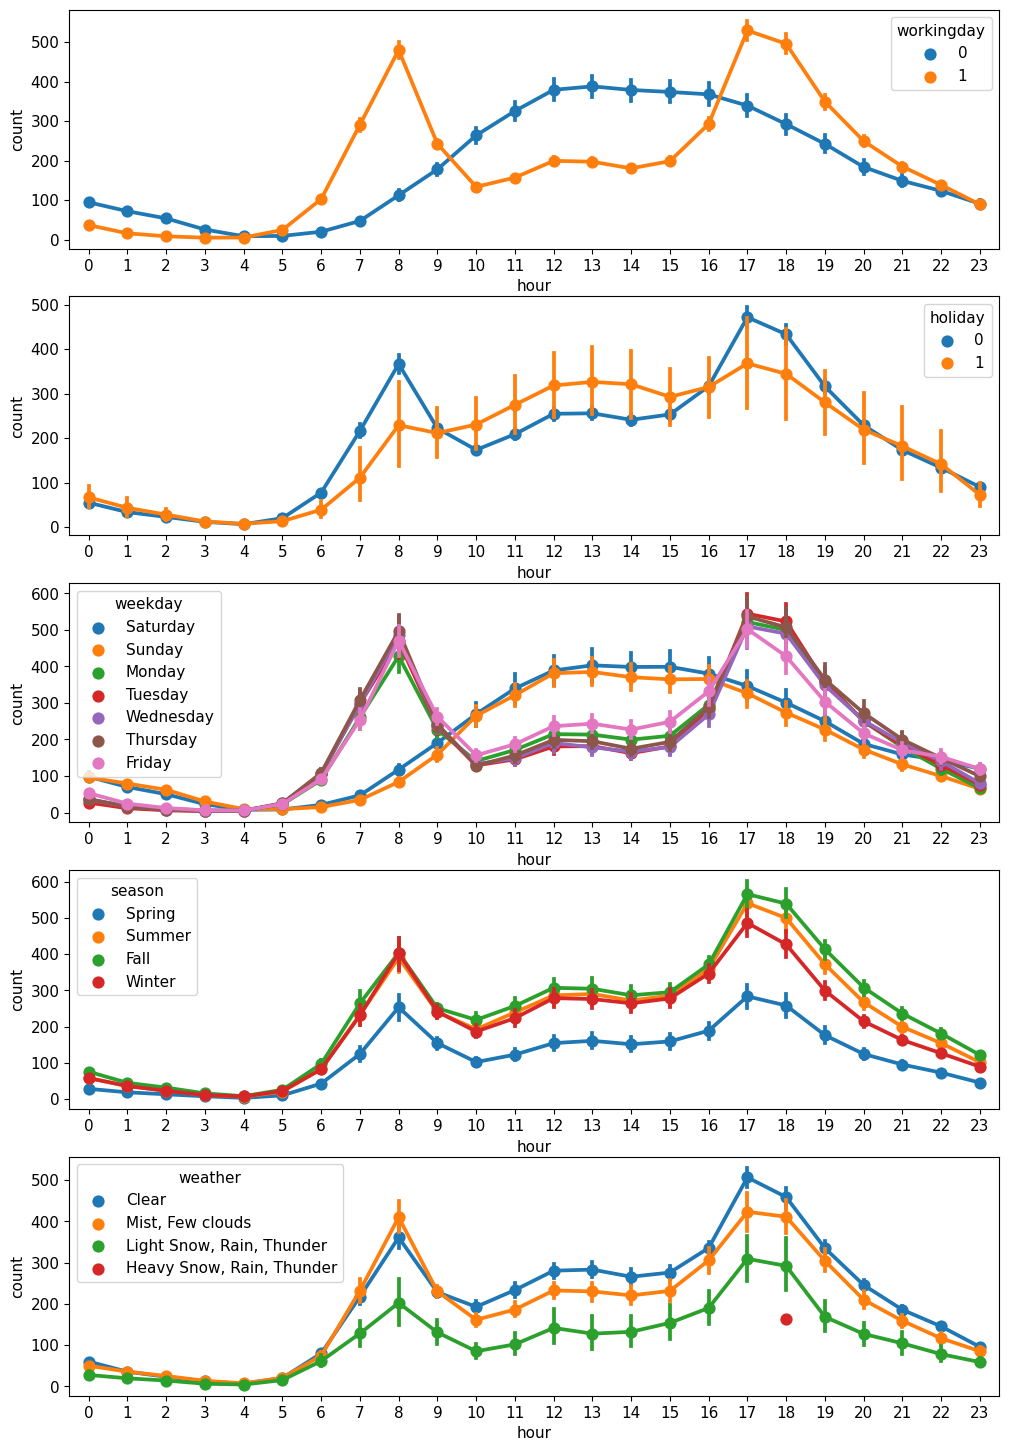

In [15]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

위 그래프 내용

1. workingday를 기준으로 근무일에는 출퇴근 시간인 7,8시와 17,18시쯤 가장많고 쉬는날엔 11\~16시쯤 까지 많다
2. holiday를 기준으로 봤을때도 위 1번과 비슷
3. weekday를 기준으로도 월\~금에는 출퇴근시간, 토\~일은 11\~16시에 많다
4. season을 기준으로 봤을때 7\~8시 11\~16시쯤 대여하는 수가 많다.
5. weather을 기준으로 봤을때 위와 비슷한시간대에 가장 수요가 많은데 Heavy Snow, Rain, Thunder인 날씨에 18시에 자전거 대여시간이 1건 있는데 이상치로 고려해 제거해야 예측결과에 좋은 결과를 낼 수 있을거 같다

# regplot 그래프 (회귀선을 포함한 산점도 그래프)

두 변수의 상관관계를 보여줄 수 있는 그래프

<Axes: xlabel='humidity', ylabel='count'>

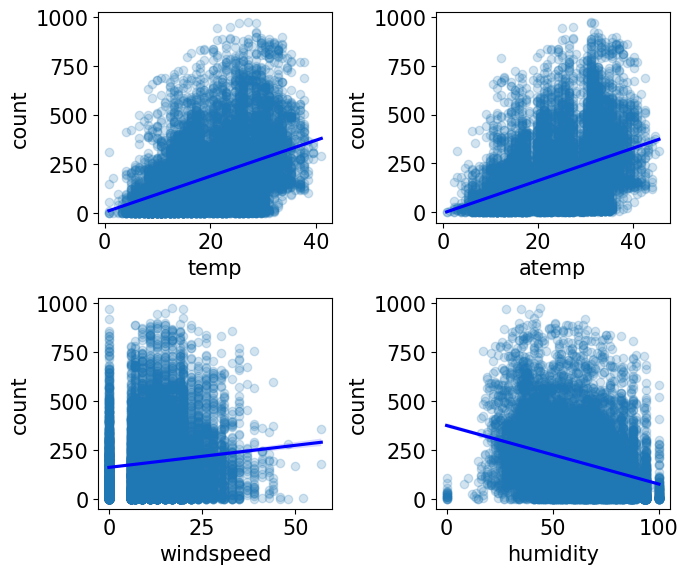

In [16]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

In [17]:
len(train[train['windspeed']==0])

1313

3번쨰 그래프인 windspeed 그래프는 데이터가 0인게 많아서 상관관계를 파악하기 힘들어서 windspeed도 예측할땐 빼야할거같다.

In [18]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

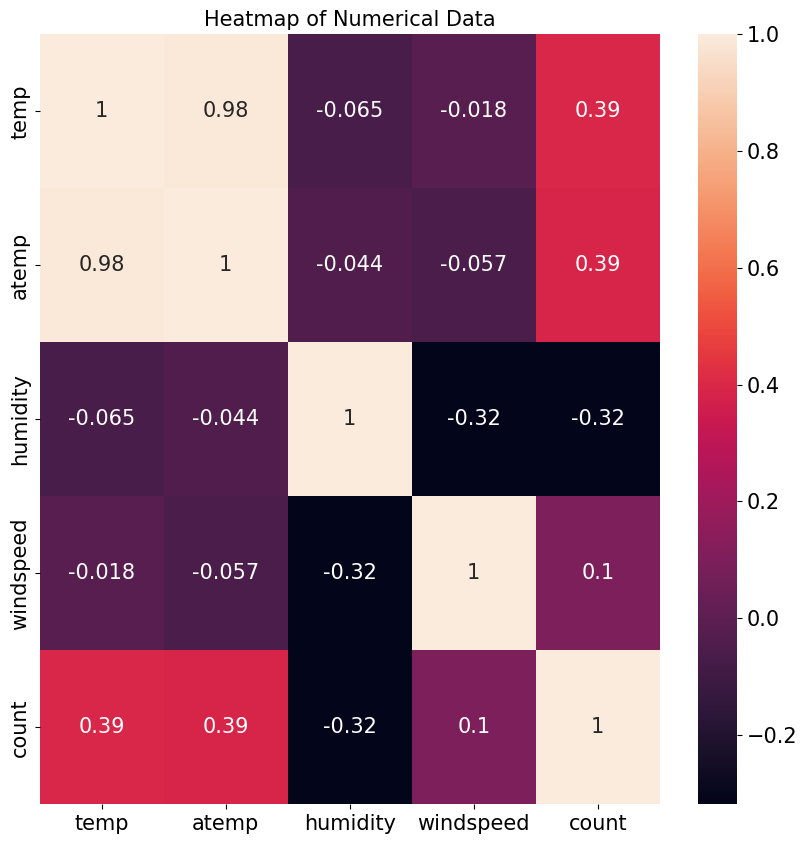

In [19]:
# 피처 간 상관관계 매트릭스
corr_mat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corr_mat, annot=True) # 상관관계 히트맵 그리기 (숫자로 표시)
ax.set(title='Heatmap of Numerical Data')

In [20]:
# 데이터 다시 reload

import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [21]:
# 아까 weather가 Heavy Snow, Rain, Thunder인 날씨 (4)를 제거
train = train[train['weather'] != 4]

In [22]:
# train data와 test data에 같은 feature enginerring을 해주기 위해 데이터를 하나로 만들기
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [23]:
# 이전에 했던내용 그대로 진행
all_data['datetime'] = pd.to_datetime(all_data['datetime'])

from datetime import datetime as dt

# 날짜, 연도, 월, 일, 시, 분, 초 파생피처 생성

all_data['date'] = all_data['datetime'].dt.date
all_data['year'] = all_data['datetime'].dt.year
all_data['month'] = all_data['datetime'].dt.month
all_data['day'] = all_data['datetime'].dt.day
all_data['hour'] = all_data['datetime'].dt.hour
all_data['minute'] = all_data['datetime'].dt.minute
all_data['second'] = all_data['datetime'].dt.second
all_data['weekday'] = all_data['datetime'].dt.weekday

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17378 non-null  datetime64[ns]
 1   season      17378 non-null  int64         
 2   holiday     17378 non-null  int64         
 3   workingday  17378 non-null  int64         
 4   weather     17378 non-null  int64         
 5   temp        17378 non-null  float64       
 6   atemp       17378 non-null  float64       
 7   humidity    17378 non-null  int64         
 8   windspeed   17378 non-null  float64       
 9   casual      10885 non-null  float64       
 10  registered  10885 non-null  float64       
 11  count       10885 non-null  float64       
 12  date        17378 non-null  object        
 13  year        17378 non-null  int32         
 14  month       17378 non-null  int32         
 15  day         17378 non-null  int32         
 16  hour        17378 non-

In [25]:
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,1,1,4,0,0,5


- Test data에 없는 feature인 'casual', 'registered' feature를 제거하고, 정보가 겹치는 다른 feature를 가진 'datetime', 'date', 'month' feature를 제거하고, 타깃값과 낮은 상관계수를 가지던 'windspeed' feature도 제거

In [26]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']

all_data = all_data.drop(drop_features, axis=1)

In [27]:
# train과 test 데이터를 합쳐서 feature를 똑같이 맞춰줬으니 다시 데이터를 분리
# count 값이 있다면 train data, count가 없으면 test data

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])] # null이 아닌것
X_test = all_data[pd.isnull(all_data['count'])] # null인것

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

In [28]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,day,hour,minute,second,weekday
0,1,0,0,1,9.84,14.395,81,2011,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,2011,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,2011,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,2011,1,4,0,0,5


In [29]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10885, dtype: int64

In [30]:
import numpy as np
# 이 문제는 RMSLE 방식으로 평가된다고 했으니 이를 구하는 함수다
# y_true: 실제 타깃값 y_pred: 예측값 conver_exp: 입력 데이터를 지수변환 해줄지에 대한 결정 (타깃값을 로그화하여 사용할거라 다시 원래 값으로 원복 해주는 과정)
def rmsle(y_true, y_pred, convert_exp=True):
    # 지수변환
    if convert_exp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

# 선형 회귀 모델로 예측


In [31]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

In [32]:
preds = linear_reg_model.predict(X_train)

print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0203


# 릿지 회귀 모델로 예측

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [34]:
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수

In [35]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


In [36]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) 

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0203


# 라쏘 회귀 모델

In [37]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


In [38]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0203


# 랜덤 포레스트 회귀 모델

In [39]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [40]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1101


# 그래디언트 부스팅 회귀

In [41]:
# from sklearn.ensemble import GradientBoostingClassifier # 이거는 분류에쓰는 그래디언 부스팅
from sklearn.ensemble import GradientBoostingRegressor

# 모델 생성
gradient_boost_model = GradientBoostingRegressor()

# 그리드서치 객체 생성
gb_grid = {
    'n_estimators': [50, 100, 150],  # 트리의 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 4, 5],  # 트리의 최대 깊이
}

gridsearch_gradient_boost_model = GridSearchCV(estimator=gradient_boost_model,
                                              param_grid=gb_grid,
                                              scoring=rmsle_scorer,
                                              cv=5,
                                              error_score='raise')


# 그리드서치 수행
log_y = np.log(y)
gridsearch_gradient_boost_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_gradient_boost_model.best_params_)

최적 하이퍼파라미터 : {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}


In [42]:
# 예측
preds = gridsearch_gradient_boost_model.best_estimator_.predict(X_train)

# 평가
print(f'그래디언트 부스팅 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

그래디언트 부스팅 회귀 RMSLE 값 : 0.2565


# XGBoost

In [43]:
from xgboost import XGBRegressor

# 모델 생성
xgb_model = XGBRegressor()

# 그리드서치 객체 생성
xgb_grid = {
    'n_estimators': [50, 100, 150],  # 트리의 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 4, 5],  # 트리의 최대 깊이
}

gridsearch_xgb_model = GridSearchCV(estimator=xgb_model,
                                    param_grid=xgb_grid,
                                    scoring=rmsle_scorer,
                                    cv=5,
                                    error_score='raise')

# 그리드서치 수행
gridsearch_xgb_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_xgb_model.best_params_)

# 예측
preds = gridsearch_xgb_model.best_estimator_.predict(X_train)

# 평가
print(f'xgboost 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

최적 하이퍼파라미터 : {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
xgboost 회귀 RMSLE 값 : 0.2386


# LightGBM

In [ ]:
from lightgbm import LGBMRegressor

# 모델 생성
lgbm_model = LGBMRegressor()

# 그리드서치 객체 생성
lgbm_grid = {
    'n_estimators': [50, 100, 150],  # 트리의 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 4, 5],  # 트리의 최대 깊이
}

gridsearch_lgbm_model = GridSearchCV(estimator=lgbm_model,
                                     param_grid=lgbm_grid,
                                     scoring=rmsle_scorer,
                                     cv=5,
                                     verbose=0,)

gridsearch_lgbm_model.fit(X_train, log_y)

In [45]:
print('최적 하이퍼파라미터 :', gridsearch_lgbm_model.best_params_)

# 예측
preds = gridsearch_lgbm_model.best_estimator_.predict(X_train)

# 평가
print(f'lightGMB 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

최적 하이퍼파라미터 : {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
lightGMB 회귀 RMSLE 값 : 0.2438


# CatBoost

In [ ]:
from catboost import CatBoostRegressor

# 모델 생성
catboost_model = CatBoostRegressor()

# 그리드서치 객체 생성
catboost_grid = {
    'iterations': [50, 100, 150],  # 트리의 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
    'depth': [3, 4, 5],  # 트리의 최대 깊이
}

gridsearch_catboost_model = GridSearchCV(estimator=catboost_model,
                                         param_grid=catboost_grid,
                                         scoring=rmsle_scorer,
                                         cv=5,
                                         error_score='raise')

# 그리드서치 수행
gridsearch_catboost_model.fit(X_train, log_y)

In [47]:
print('최적 하이퍼파라미터 :', gridsearch_catboost_model.best_params_)

# 예측
preds = gridsearch_catboost_model.best_estimator_.predict(X_train)

# 평가
print(f'CatBoost 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

최적 하이퍼파라미터 : {'depth': 5, 'iterations': 150, 'learning_rate': 0.1}
CatBoost 회귀 RMSLE 값 : 0.2943


In [48]:
from sklearn.ensemble import AdaBoostRegressor

# 모델 생성
adaboost_model = AdaBoostRegressor()

# 그리드서치 객체 생성
adaboost_grid = {
    'n_estimators': [50, 100, 150],  # 트리의 개수
    'learning_rate': [0.05, 0.1, 0.2],  # 학습률
}

gridsearch_adaboost_model = GridSearchCV(estimator=adaboost_model,
                                         param_grid=adaboost_grid,
                                         scoring=rmsle_scorer,
                                         cv=5,
                                         error_score='raise')

# 그리드서치 수행
gridsearch_adaboost_model.fit(X_train, log_y)

GridSearchCV(cv=5, error_score='raise', estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [49]:
print('최적 하이퍼파라미터 :', gridsearch_adaboost_model.best_params_)

# 예측
preds = gridsearch_adaboost_model.best_estimator_.predict(X_train)

# 평가
print(f'그래디언트 부스팅 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

최적 하이퍼파라미터 : {'learning_rate': 0.2, 'n_estimators': 150}
그래디언트 부스팅 회귀 RMSLE 값 : 0.6552


| 모델 | RMSLE |
| --- | --- |
| 랜덤 포레스트 회귀 | 0.1101 |
| XGBoost | 0.2386 |
| lightGMB | 0.2438 |
| 그래디언트 부스팅 회귀 | 0.2565 |
| CatBoost | 0.2943 |
| 그래디언트 부스팅 회귀 | 0.6552 |
| 선형회귀 | 1.0203 |
| 릿지회귀 | 1.0203 |
| 라쏘회귀 | 1.0203 |

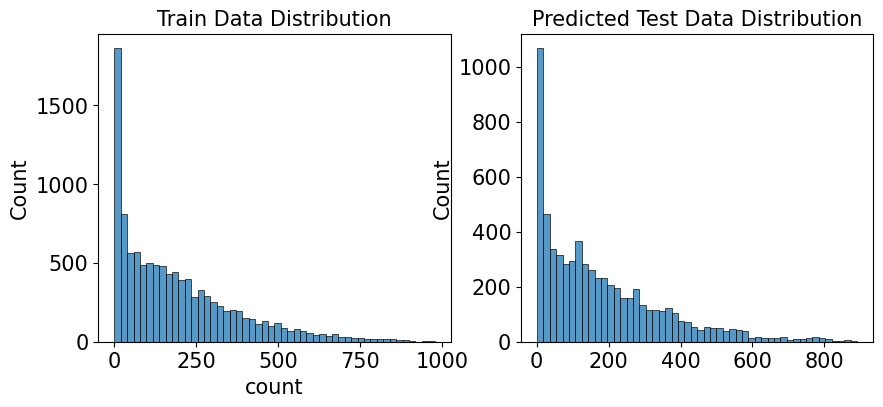

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

    figure, axes = plt.subplots(ncols=2)
    figure.set_size_inches(10, 4)

    sns.histplot(y, bins=50, ax=axes[0])
    axes[0].set_title('Train Data Distribution')
    sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
    axes[1].set_title('Predicted Test Data Distribution')